<a href="https://colab.research.google.com/github/gabilodeau/INF8770/blob/master/Transformee%20DCT%20et%20quantification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INF8770 Technologies multimédias

Polytechnique Montréal

Exemple de transformée de cosinus discrète et de quantification

Exécuter les 2 lignes suivantes pour colab.

In [1]:
!git clone https://github.com/gabilodeau/INF8770
%cd INF8770

Cloning into 'INF8770'...
remote: Enumerating objects: 165, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (156/156), done.
remote: Total 460 (delta 72), reused 27 (delta 8), pack-reused 295
Receiving objects: 100% (460/460), 42.23 MiB | 11.35 MiB/s, done.
Resolving deltas: 100% (226/226), done.
/content/INF8770


In [2]:
import numpy as np
import scipy.fftpack as dctpack
from skimage import io
import matplotlib.pyplot as plt

Lecture d'une image

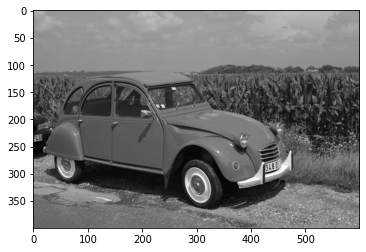

In [3]:
img = io.imread('RGB.jpg', as_gray=True)*255
plt.imshow(img,cmap = plt.get_cmap('gray'))
plt.show()

On prélève le premier bloc de l'image et on applique la DCT sur ce bloc.

In [4]:
BlocImage = img[0:8,0:8]
BlocDCT = np.zeros((8,8))
print('Bloc de image:\n',BlocImage,'\n')

#On soustrait 128 pour avoir en signal oscillant autour de zéro
BlocImage = BlocImage - 128
#DCT en 2 étapes. La DCT est une transformation séparable. On peut appliquer en X et ensuite en Y.
BlocDCT = dctpack.dct(dctpack.dct(BlocImage, axis=0, norm='ortho'), axis=1, norm='ortho')
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)
print('Bloc après DCT:\n',BlocDCT)

Bloc de image:
 [[148.5893 147.2951 147.1413 154.7692 165.9    169.175  168.6    170.6   ]
 [148.0768 151.5701 155.9192 162.5471 170.1808 170.8183 169.8183 172.6   ]
 [147.4922 156.1259 164.5471 171.1808 173.6058 170.6741 169.6741 172.6058]
 [150.048  160.1884 168.6096 173.8183 175.6741 171.6741 169.177  172.6799]
 [155.898  163.2509 170.175  173.5279 175.6741 173.6741 170.6799 171.1087]
 [159.898  165.2509 169.175  171.8183 174.6741 175.177  171.1087 171.4712]
 [157.9759 164.0442 166.8221 166.175  170.8183 170.6779 169.1808 168.6096]
 [154.3384 160.9759 162.6096 162.6779 164.175  165.6779 164.8221 165.7538]] 

Bloc après DCT:
 [[299.66 -44.53 -22.95  -3.92   0.08  -6.61   0.21   0.08]
 [-13.46 -18.78  -0.54   3.59   5.19  -0.07  -0.26   0.1 ]
 [-23.34  -4.1   12.09   7.74  -0.28  -0.17  -0.28   0.08]
 [  3.73  -0.26   4.21   7.     0.17   0.11   0.69   0.15]
 [ -6.42   0.23   1.05   0.09   0.3   -0.05  -0.19  -0.38]
 [ -0.07  -0.2   -0.15  -0.11   0.14  -0.64  -0.36   0.54]
 [ -0.36  

Quantification et calcul des erreurs causées par celle-ci.

In [5]:
Quant1= np.matrix('16 11 10 16 24 40 51 61;\
    12 12 14 19 26 58 60 55;\
    14 13 16 24 40 57 69 56;\
    14 17 22 29 51 87 80 62;\
    18 22 37 56 68 109 103 77;\
    24 35 55 64 81 104 103 92;\
    49 64 78 77 103 121 120 101;\
    72 92 95 98 112 100 103 99').astype('float')

BlocQuant1 = np.round(np.divide(BlocDCT, Quant1))
print('Bloc quantifié:\n',BlocQuant1,'\n')

#Quantification et transformation inverse
BlocDCTavecP1 = np.multiply(BlocQuant1,Quant1)
BlocImageavecP1 = dctpack.idct(dctpack.idct(BlocDCTavecP1, axis=0, norm='ortho'), axis=1, norm='ortho') + 128
print('Bloc image reconstruit:\n',BlocImageavecP1,'\n')

BlocImage = BlocImage + 128
print('Erreurs dues à la quantification:\n',np.abs(BlocImageavecP1-BlocImage))

Bloc quantifié:
 [[19. -4. -2. -0.  0. -0.  0.  0.]
 [-1. -2. -0.  0.  0. -0. -0.  0.]
 [-2. -0.  1.  0. -0. -0. -0.  0.]
 [ 0. -0.  0.  0.  0.  0.  0.  0.]
 [-0.  0.  0.  0.  0. -0. -0. -0.]
 [-0. -0. -0. -0.  0. -0. -0.  0.]
 [-0.  0. -0. -0.  0.  0.  0. -0.]
 [-0.  0. -0. -0. -0.  0. -0.  0.]] 

Bloc image reconstruit:
 [[146.09 148.05 151.69 156.53 161.86 166.88 170.77 172.89]
 [147.97 150.96 156.02 161.7  166.68 170.2  172.19 173.01]
 [151.14 155.54 162.48 169.23 173.56 174.83 174.02 172.93]
 [154.7  159.95 167.95 175.09 178.59 177.9  174.83 172.26]
 [157.83 162.73 170.08 176.38 178.96 177.43 173.71 170.79]
 [160.03 163.44 168.54 172.89 174.62 173.48 170.83 168.75]
 [161.28 162.78 165.09 167.18 168.27 168.19 167.42 166.75]
 [161.8  161.99 162.39 162.99 163.73 164.5  165.14 165.51]] 

Erreurs dues à la quantification:
 [[2.5  0.75 4.55 1.76 4.04 2.3  2.17 2.29]
 [0.11 0.61 0.1  0.84 3.5  0.62 2.37 0.41]
 [3.64 0.59 2.07 1.95 0.04 4.15 4.34 0.33]
 [4.65 0.24 0.65 1.28 2.91 6.22 5.66

Si on quantifie plus, les erreurs seront plus grandes. Exemple. 

In [6]:
Quant2 = np.matrix('53 37 33 53 80 133 170 203;\
    40 40 47 63 87 193 200 183;\
    47 43 53 80 133 190 230 187;\
    47 57 73 97 170 290 267 207;\
    60 73 123 187 227 363 343 257;\
    80 117 183 213 270 347 377 307;\
    163 213 260 290 343 403 400 337;\
    240 307 317 327 373 333 343 300').astype('float')

BlocQuant2 = np.round(np.divide(BlocDCT, Quant2))
print('Bloc quantifié:\n',BlocQuant2,'\n')

#Quantification et transformation inverse
BlocDCTavecP2 = np.multiply(BlocQuant2,Quant2)
BlocImageavecP2 = dctpack.idct(dctpack.idct(BlocDCTavecP2, axis=0, norm='ortho'), axis=1, norm='ortho') + 128
print('Bloc image reconstruit:\n',BlocImageavecP2,'\n')

print('Erreurs dues à la quantification:\n',np.abs(BlocImageavecP2-BlocImage))

Bloc quantifié:
 [[ 6. -1. -1. -0.  0. -0.  0.  0.]
 [-0. -0. -0.  0.  0. -0. -0.  0.]
 [-0. -0.  0.  0. -0. -0. -0.  0.]
 [ 0. -0.  0.  0.  0.  0.  0.  0.]
 [-0.  0.  0.  0.  0. -0. -0. -0.]
 [-0. -0. -0. -0.  0. -0. -0.  0.]
 [-0.  0. -0. -0.  0.  0.  0. -0.]
 [-0.  0. -0. -0. -0.  0. -0.  0.]] 

Bloc image reconstruit:
 [[155.95 160.08 166.35 171.86 174.42 173.62 170.96 168.78]
 [155.95 160.08 166.35 171.86 174.42 173.62 170.96 168.78]
 [155.95 160.08 166.35 171.86 174.42 173.62 170.96 168.78]
 [155.95 160.08 166.35 171.86 174.42 173.62 170.96 168.78]
 [155.95 160.08 166.35 171.86 174.42 173.62 170.96 168.78]
 [155.95 160.08 166.35 171.86 174.42 173.62 170.96 168.78]
 [155.95 160.08 166.35 171.86 174.42 173.62 170.96 168.78]
 [155.95 160.08 166.35 171.86 174.42 173.62 170.96 168.78]] 

Erreurs dues à la quantification:
 [[ 7.36 12.78 19.21 17.09  8.52  4.44  2.36  1.82]
 [ 7.87  8.51 10.43  9.32  4.23  2.8   1.14  3.82]
 [ 8.45  3.95  1.8   0.68  0.81  2.94  1.28  3.83]
 [ 5.9   0.1